In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import praw

In [3]:
stock_names = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

start_date = '2023-09-26'
end_date = '2024-09-26'

stocks = []

for stock in stock_names:
    data = yf.download(stock, start=start_date, end=end_date)

    ticker = yf.Ticker(stock)
    stock_info = ticker.info

    data['Industry'] = stock_info.get('industry', 'N/A')
    data['Sector'] = stock_info.get('sector', 'N/A')
    data['Marketcap'] = stock_info.get('marketCap', 'N/A')
    data['Fulltimeemployees'] = stock_info.get('fullTimeEmployees', 'N/A')
    data['Volume'] = stock_info.get('volume', 'N/A')
    data['PEratio'] = stock_info.get('trailingPE', 'N/A')
    data['Dividendyield'] = stock_info.get('dividendYield', 'N/A')
    data['Companyinfo'] = stock_info.get('longBusinessSummary', 'N/A')
    data['Ticker'] = stock
    data.reset_index(inplace=True)

    stocks.append(data)


df = pd.concat(stocks, ignore_index=True)
df.set_index('Date', inplace=True)
print(df.shape, df.head())

df.to_csv('stocks.csv', index=False)
df.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(1260, 14)                  Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-09-26  24.160000  24.160000  20.200001  23.120001  23.120001   29305   
2023-09-27  22.400000  23.040001  22.000000  22.080000  22.080000   29305   
2023-09-28  20.799999  23.040001  20.200001  21.160000  21.160000   29305   
2023-09-29  20.559999  21.639999  20.400000  20.480000  20.480000   29305   
2023-10-02  21.840000  21.840000  20.000000  20.719999  20.719999   29305   

                 Industry      Sector  Marketcap  Fulltimeemployees PEratio  \
Date                                                                          
2023-09-26  Biotechnology  Healthcare   38152952                 12     N/A   
2023-09-27  Biotechnology  Healthcare   38152952                 12     N/A   
2023-09-28  Biotechnology  Healthcare   38152952                 12     N/A   
2023-09-29  Biotechnology  Healthcare   38152952      

(1260, 14)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Industry,Sector,Marketcap,Fulltimeemployees,PEratio,Dividendyield,Companyinfo,Ticker
Date,,,,,,,,,,,,,,
2023-09-26,24.160000,24.160000,20.200001,23.120001,23.120001,29305,Biotechnology,Healthcare,38152952,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-27,22.400000,23.040001,22.000000,22.080000,22.080000,29305,Biotechnology,Healthcare,38152952,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-28,20.799999,23.040001,20.200001,21.160000,21.160000,29305,Biotechnology,Healthcare,38152952,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-29,20.559999,21.639999,20.400000,20.480000,20.480000,29305,Biotechnology,Healthcare,38152952,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-10-02,21.840000,21.840000,20.000000,20.719999,20.719999,29305,Biotechnology,Healthcare,38152952,12,N/A,N/A,"Onconetix, Inc., a biotechnology company, focu...",ONCO


In [ ]:
df.replace('N/A', None, inplace=True) #replace srings with nonetype
df.isna().any() #check for nones

Open                 False
High                 False
Low                  False
Close                False
Adj Close            False
Volume               False
Industry             False
Sector               False
Marketcap            False
Fulltimeemployees    False
PEratio               True
Dividendyield         True
Companyinfo          False
Ticker               False
dtype: bool

In [ ]:
print(df.PEratio.isna().all(), df.Dividendyield.isna().all()) #check if all items are nones

True True


In [ ]:
df=df.drop(columns=['PEratio', 'Dividendyield']) #drop these columns
df.head() 

,Open,High,Low,Close,Adj Close,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Ticker
Date,,,,,,,,,,,,
2023-09-26,24.160000,24.160000,20.200001,23.120001,23.120001,29305,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-27,22.400000,23.040001,22.000000,22.080000,22.080000,29305,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-28,20.799999,23.040001,20.200001,21.160000,21.160000,29305,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-09-29,20.559999,21.639999,20.400000,20.480000,20.480000,29305,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2023-10-02,21.840000,21.840000,20.000000,20.719999,20.719999,29305,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO


In [8]:
df.rename(columns={'Adj Close':'Adjclose'}, inplace=True) #rename column
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adjclose             float64
Volume                 int64
Industry              object
Sector                object
Marketcap              int64
Fulltimeemployees      int64
Companyinfo           object
Ticker                object
dtype: object

In [ ]:
print(df.Industry.unique())
print(df.Sector.unique())

['Biotechnology' 'Specialty Chemicals' 'Information Technology Services']
['Healthcare' 'Basic Materials' 'Technology']


In [10]:
industry_groups=df.groupby('Industry')['Ticker'].unique()
print("\nStock Tickers by Industry:")
print(industry_groups)
sector_groups=df.groupby('Sector')['Ticker'].unique()
print("\nStock Tickers by Sector:")
print(sector_groups)


Stock Tickers by Industry:
Industry
Biotechnology                      [ONCO, TNXP, KTTA]
Information Technology Services                [APLD]
Specialty Chemicals                            [CNEY]
Name: Ticker, dtype: object

Stock Tickers by Sector:
Sector
Basic Materials                [CNEY]
Healthcare         [ONCO, TNXP, KTTA]
Technology                     [APLD]
Name: Ticker, dtype: object


In [11]:
df=df.sort_values(by=['Industry', 'Ticker']) #makes it easier to graph by clumping the same industry together

In [ ]:
for i in range(5):
    print(textwrap.fill(df.Companyinfo.unique()[i], width=80)) #read company info
    print()

Pasithea Therapeutics Corp., a biotechnology company, engages in discovery,
research, and development of treatments for central nervous system disorders,
RASopathies, and other diseases. Its lead product candidate PAS-004, a next-
generation macrocyclic mitogen-activated protein kinase, or MEK inhibitor for
use in the treatment of a range of RASopathies, including neurofibromatosis type
1 oncology indications. The company intends to develop PAS-003, to treat
amyotrophic lateral sclerosis; and PAS-001, to treat schizophrenia. Pasithea
Therapeutics Corp. was incorporated in 2020 and is headquartered in Miami Beach,
Florida.

Onconetix, Inc., a biotechnology company, focuses on the research, development,
and commercialization of solutions for men's health and oncology. It offers
Entadfi, an FDA-approved, once daily pill that combines finasteride and
tadalafil for the treatment of benign prostatic hyperplasia; and Proclarix, an
in vitro protein-based blood diagnostic test for prostate canc

In [ ]:
print(df.groupby(['Ticker', 'Industry']).Adjclose.describe()) #look at Adjclose values

                                        count      mean       std    min  \
Ticker Industry                                                            
APLD   Information Technology Services  252.0  4.879861  1.208095  2.390   
CNEY   Specialty Chemicals              252.0  1.378925  1.011493  0.280   
KTTA   Biotechnology                    252.0  6.548488  1.322316  3.845   
ONCO   Biotechnology                    252.0  8.192690  3.921512  2.960   
TNXP   Biotechnology                    252.0  8.220119  6.403125  0.130   

                                           25%    50%       75%        max  
Ticker Industry                                                             
APLD   Information Technology Services  4.1575  4.710   5.53750   8.520000  
CNEY   Specialty Chemicals              0.4875  1.145   1.89750   3.630000  
KTTA   Biotechnology                    5.5925  6.731   7.30425   9.600000  
ONCO   Biotechnology                    5.9100  6.680   8.77000  23.120001  
TNXP 

In [ ]:
df[(df.Ticker == 'TNXP') & (df.Adjclose == df.Adjclose.max())] #look at max value

,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Ticker
Date,,,,,,,,,,,,
2023-09-26,25.92,25.92,24.639999,25.280001,25.280001,4305027,Biotechnology,Healthcare,20158128,103,"Tonix Pharmaceuticals Holding Corp., a biophar...",TNXP


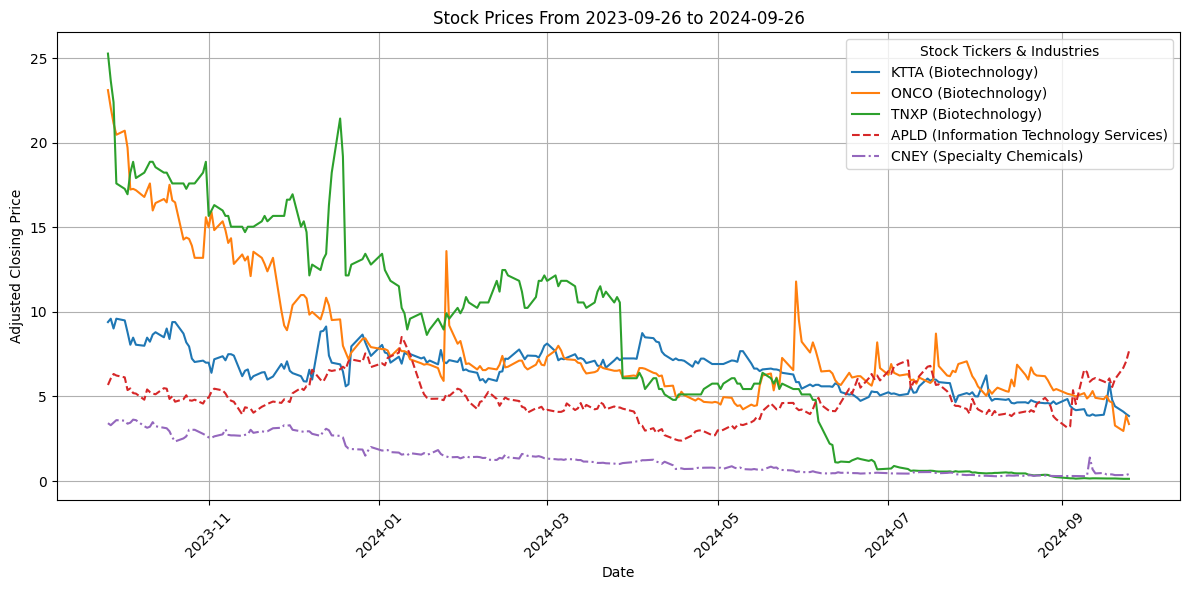

In [15]:
plt.figure(figsize=(12, 6))

# Get unique industries and define line styles
industries = df['Industry'].unique()
line_styles = ['-', '--', '-.', ':']  # Different line styles
style_map = {industry: line_styles[i % len(line_styles)] for i, industry in enumerate(industries)}

# Create a list to hold custom legend handles
legend_handles = []

# Loop through each ticker to plot
for ticker in df['Ticker'].unique():
    dfbyticker = df[df['Ticker'] == ticker]
    industry = dfbyticker['Industry'].iloc[0]  # Get the industry for the ticker
    line_style = style_map[industry]  # Get the line style for the industry
    
    # Plot the adjusted closing price
    line, = plt.plot(dfbyticker.index, dfbyticker['Adjclose'], 
                     label=ticker, 
                     linestyle=line_style)  # Apply the industry line style
    
    # Create a custom legend handle with the same color as the line
    legend_handles.append((industry, ticker, line.get_color(), line_style))  # Store as a tuple

# Create legend lines with appropriate colors (without sorting)
legend_lines = [mlines.Line2D([], [], color=color, linestyle=style, label=f'{ticker} ({industry})') 
                for industry, ticker, color, style in legend_handles]

plt.title(f'Stock Prices From {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.xticks(rotation=45)

# Add the custom legend with colored handles
plt.legend(handles=legend_lines, title='Stock Tickers & Industries')

plt.grid()
plt.tight_layout()
plt.show()

## Decomposition & ADF and KPSS Tests for Stationarity

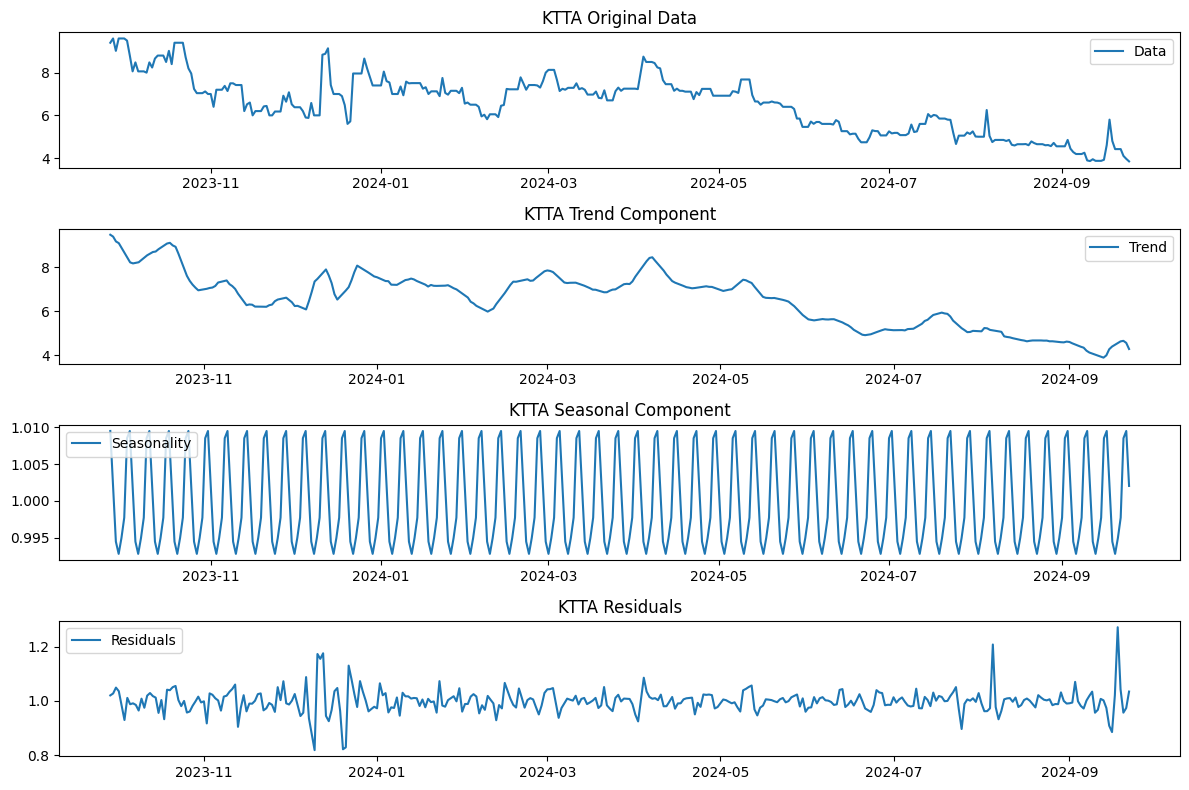

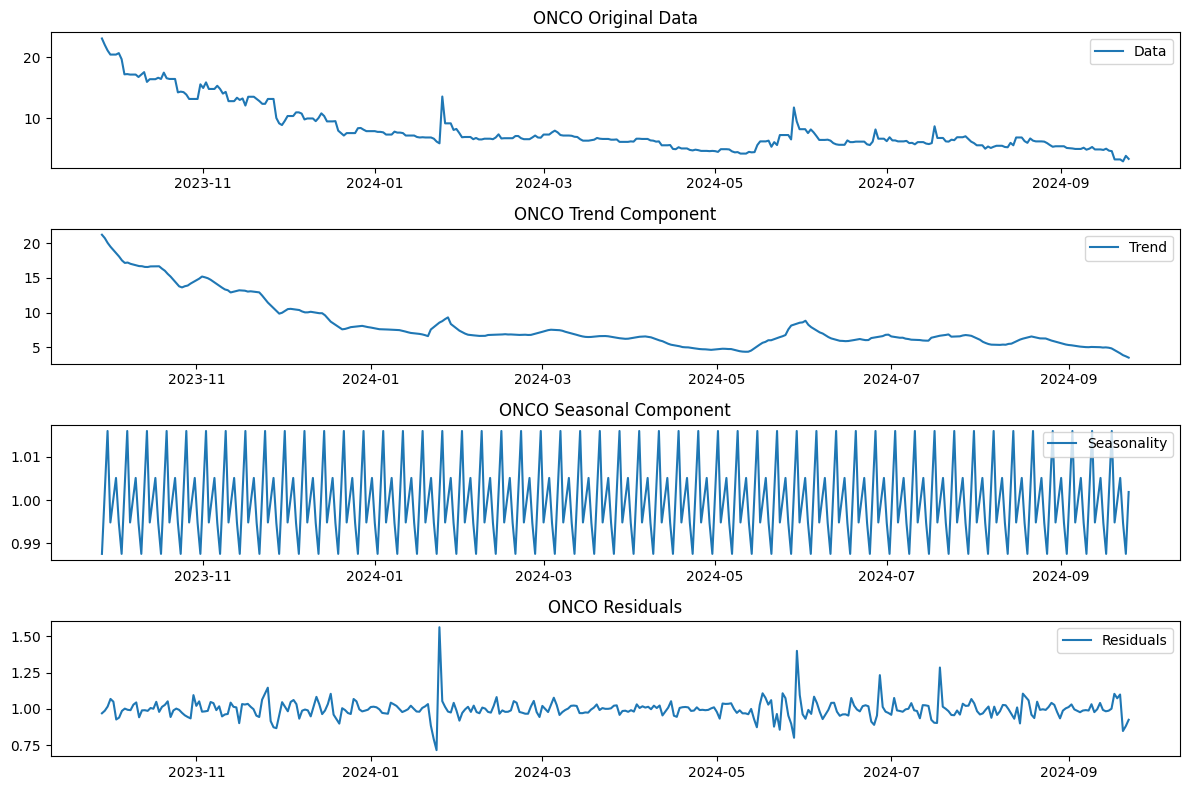

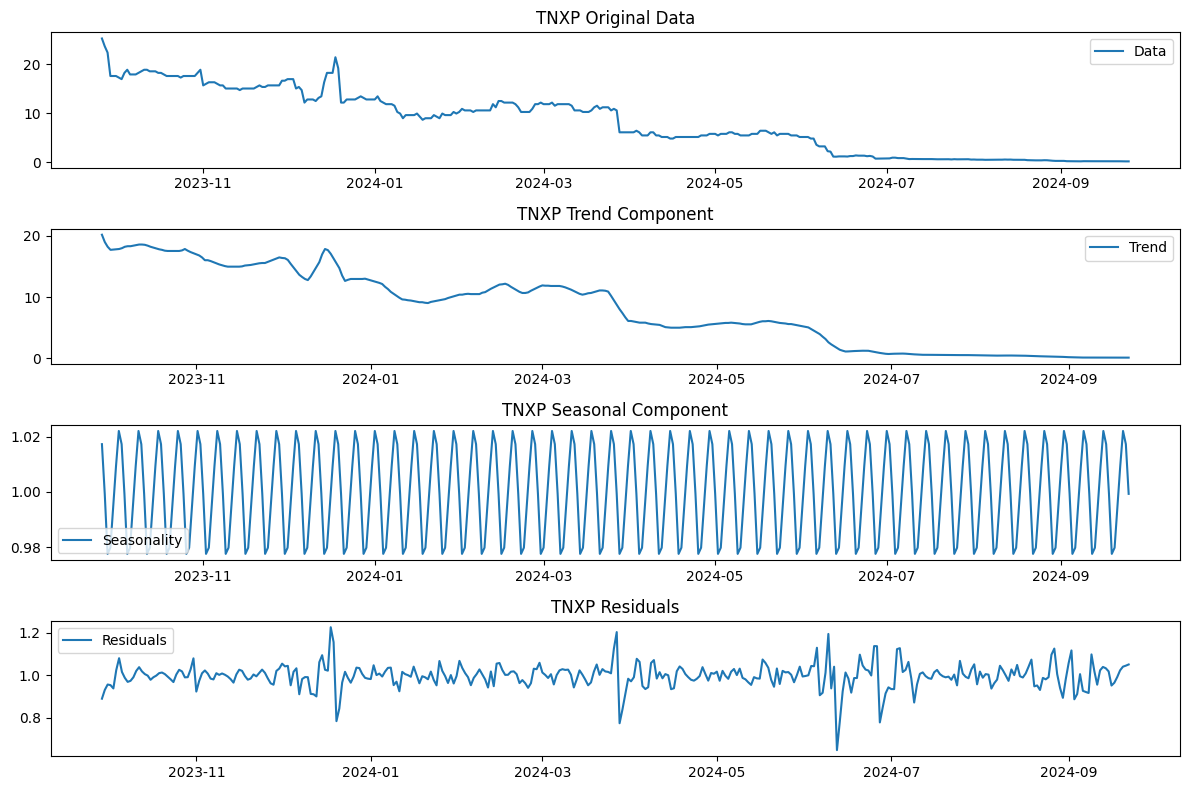

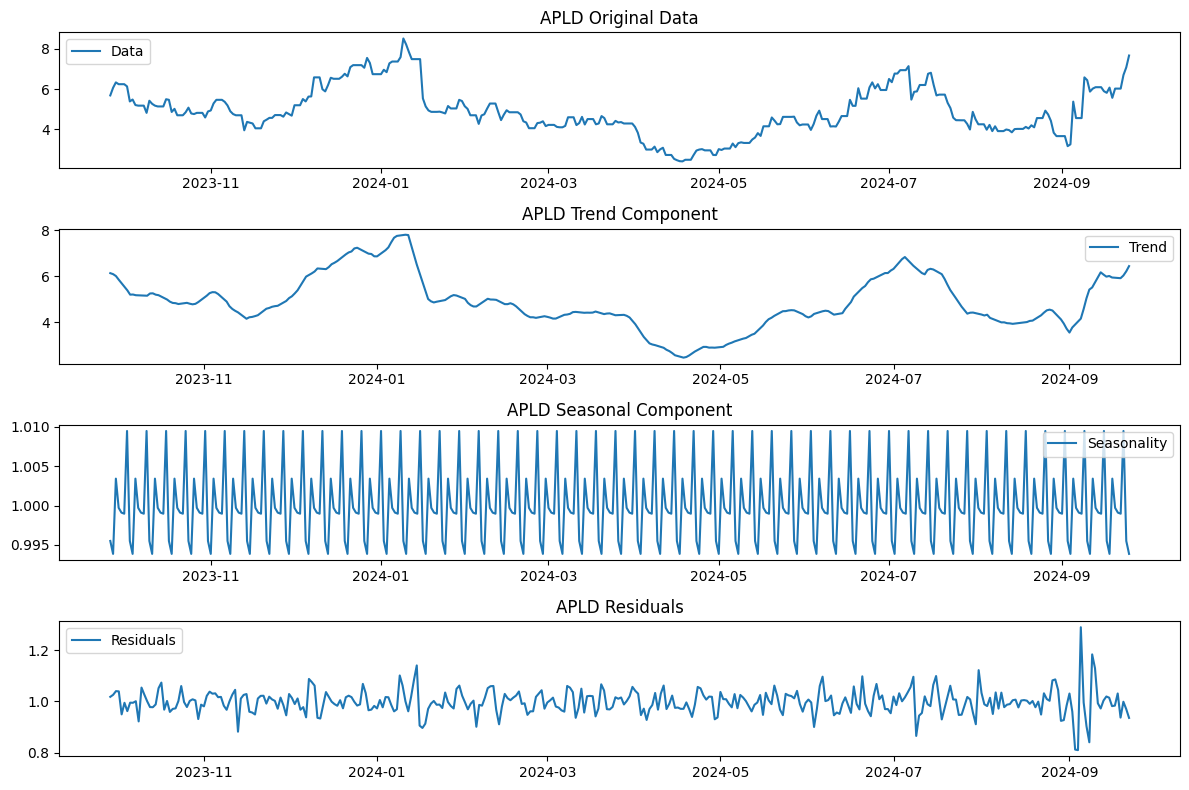

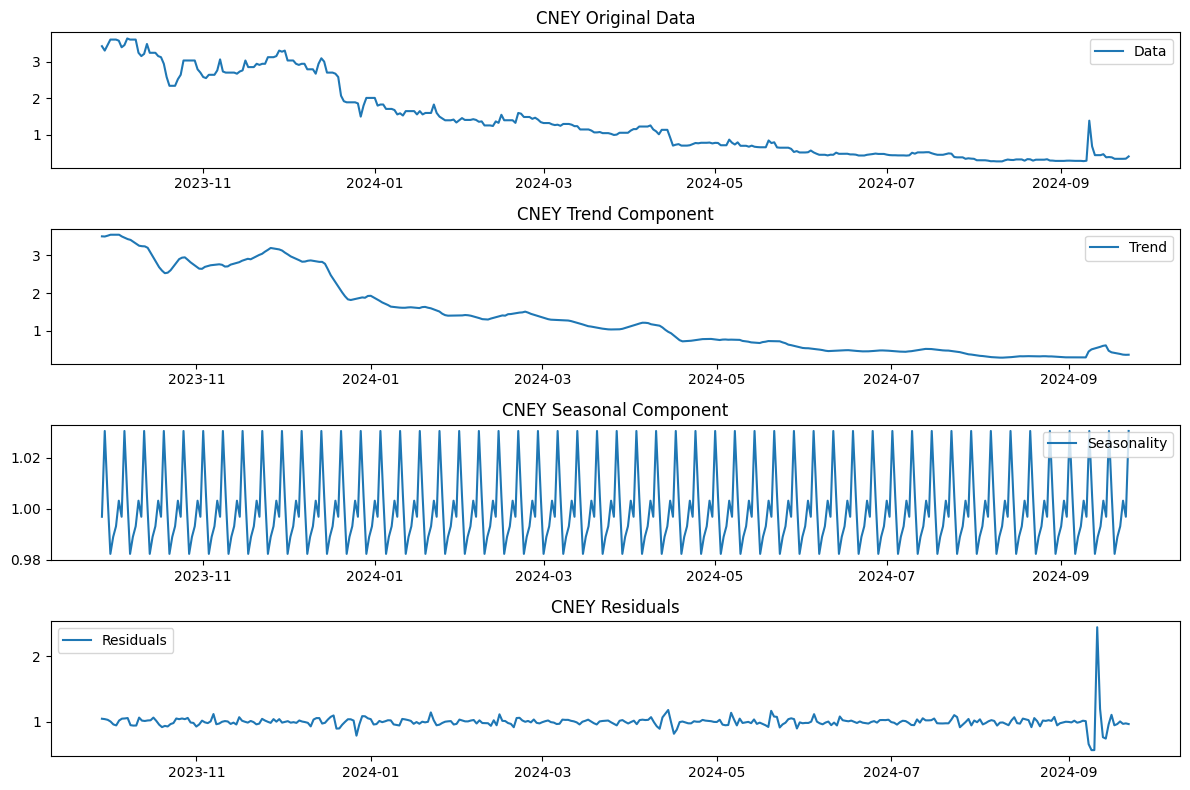

In [16]:
for ticker in df['Ticker'].unique():
    y = df[df['Ticker'] == ticker]['Adjclose'].asfreq('D')
    y.ffill(inplace=True)
    decomp = seasonal_decompose(y, model='multiplicative') #we use a multiplicative model since variations aren't constant

    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(y, label='Data')
    plt.title(f'{ticker} Original Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomp.trend, label='Trend')
    plt.title(f'{ticker} Trend Component')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomp.seasonal, label='Seasonality')
    plt.title(f'{ticker} Seasonal Component')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomp.resid, label='Residuals')
    plt.title(f'{ticker} Residuals')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

Write trend

In [17]:
df['Adjclosefreq'] = df.groupby('Ticker')['Adjclose'].transform(lambda x: x.asfreq('D').ffill())
df['LogDiff'] = df.groupby('Ticker')['Adjclosefreq'].transform(lambda x: np.log(x).diff())
df.head()

,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Ticker,Adjclosefreq,LogDiff
Date,,,,,,,,,,,,,,
2023-09-26,8.84,9.60,8.84,9.40,9.40,8912,Biotechnology,Healthcare,5408334,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,9.40,NaN
2023-09-27,9.00,9.60,9.00,9.60,9.60,8912,Biotechnology,Healthcare,5408334,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,9.60,0.021053
2023-09-28,9.40,9.58,8.84,9.02,9.02,8912,Biotechnology,Healthcare,5408334,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,9.02,-0.062319
2023-09-29,9.40,9.60,9.00,9.60,9.60,8912,Biotechnology,Healthcare,5408334,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,9.60,0.062319
2023-10-02,9.00,9.60,9.00,9.50,9.50,8912,Biotechnology,Healthcare,5408334,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,9.50,-0.010471


In [18]:
for ticker in df.Ticker.unique():
    y = df[df['Ticker'] == ticker]['Adjclose'].asfreq('D')
    y.ffill(inplace=True)
    result=adfuller(y)
    print(f'{ticker} ADF Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')

KTTA ADF Statistic: -1.427, p-value: 0.569
ONCO ADF Statistic: -3.611, p-value: 0.006
TNXP ADF Statistic: -1.189, p-value: 0.678
APLD ADF Statistic: -2.358, p-value: 0.154
CNEY ADF Statistic: -1.715, p-value: 0.423


Only the ONCO series seems stationary from the ADF test.

In [19]:
for ticker in df.Ticker.unique():
    y = df[df['Ticker'] == ticker]['Adjclose'].asfreq('D')
    y.ffill(inplace=True)
    result=kpss(y)
    print(f'{ticker} KPSS Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')


NameError: name 'kpss' is not defined

Only the APLD series seems stationary from the KPSS tests. All tests conclude that KTTA, TNXP, and CNEY are non-stationary. ONCO and APLD show conflicting results but it may make sense to apply a differencing and log transform to all stocks to stabilize them. 

In [53]:
for ticker in df.Ticker.unique():
    y = df[df['Ticker'] == ticker]['Adjclose'].asfreq('D')
    y.ffill(inplace=True)
    result=adfuller(y)
    print(f'{ticker} ADF Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')
    result=kpss(y)
    print(f'{ticker} KPSS Statistic: {result[0]:.3f}, p-value: {result[1]:.3f}')
    
    y=np.log(y).diff().dropna()
    result=adfuller(y)
    print(f'{ticker} ADF Statistic (logged & diffed): {result[0]:.3f}, p-value: {result[1]:.3f}')
    result=kpss(y)
    print(f'{ticker} KPSS Statistic (logged & diffed): {result[0]:.3f}, p-value: {result[1]:.3f}')


KTTA ADF Statistic: -1.427, p-value: 0.569
KTTA KPSS Statistic: 2.207, p-value: 0.010
KTTA ADF Statistic (logged & diffed): -9.508, p-value: 0.000
KTTA KPSS Statistic (logged & diffed): 0.078, p-value: 0.100
ONCO ADF Statistic: -3.611, p-value: 0.006
ONCO KPSS Statistic: 2.120, p-value: 0.010
ONCO ADF Statistic (logged & diffed): -11.888, p-value: 0.000
ONCO KPSS Statistic (logged & diffed): 0.124, p-value: 0.100
TNXP ADF Statistic: -1.189, p-value: 0.678
TNXP KPSS Statistic: 3.044, p-value: 0.010
TNXP ADF Statistic (logged & diffed): -17.931, p-value: 0.000
TNXP KPSS Statistic (logged & diffed): 0.373, p-value: 0.089
APLD ADF Statistic: -2.358, p-value: 0.154
APLD KPSS Statistic: 0.398, p-value: 0.078
APLD ADF Statistic (logged & diffed): -7.452, p-value: 0.000
APLD KPSS Statistic (logged & diffed): 0.141, p-value: 0.100
CNEY ADF Statistic: -1.715, p-value: 0.423
CNEY KPSS Statistic: 2.867, p-value: 0.010
CNEY ADF Statistic (logged & diffed): -14.527, p-value: 0.000
CNEY KPSS Statisti

/tmp/ipykernel_13636/3406849058.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(y)
/tmp/ipykernel_13636/3406849058.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(y)
/tmp/ipykernel_13636/3406849058.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(y)
/tmp/ipykernel_13636/3406849058.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(y)
/tmp/ipykernel_13636/3406849058.py:6: InterpolationWarning: The test statistic is outside of the range of p-va

Each stock is now stationary. 

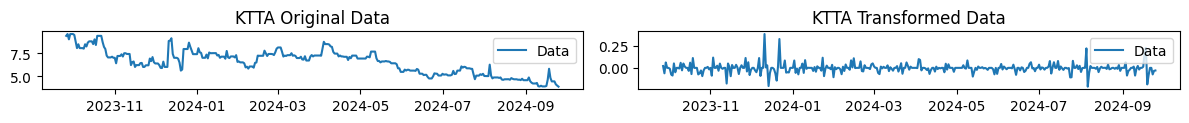

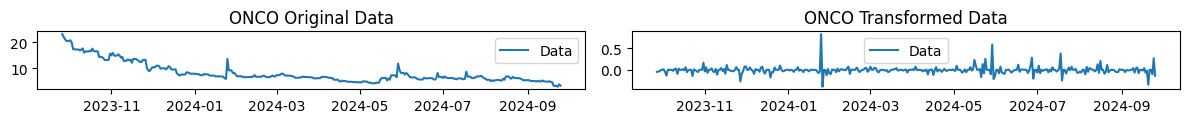

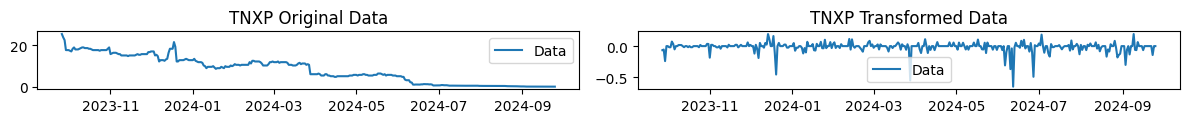

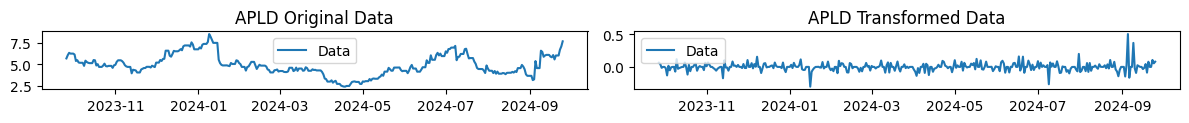

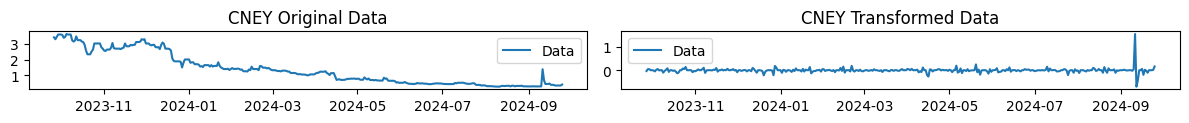

In [54]:
for ticker in df.Ticker.unique():
    y = df[df['Ticker'] == ticker]['Adjclose'].asfreq('D')
    y.ffill(inplace=True)
    newy=np.log(y).diff().dropna()

    plt.figure(figsize=(12, 4))

    plt.subplot(421)
    plt.plot(y, label='Data')
    plt.title(f'{ticker} Original Data')
    plt.legend(loc='best')

    plt.subplot(422)
    plt.plot(newy, label='Data')
    plt.title(f'{ticker} Transformed Data')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

In [70]:
#make predictive column for "To simplify the target variable, we ask that you use a binary classifier (1/0) that denotes whether there was a price increase (1) or not (0) from the previous trading day."
for ticker in df['Ticker'].unique():
    df.loc[df['Ticker'] == ticker, 'Priceincrease'] = (df[df['Ticker'] == ticker]['Adjclose'].diff() > 0).astype(int)
n
df.head()

,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Ticker,Priceincrease
Date,,,,,,,,,,,,,
2023-09-26,8.84,9.60,8.84,9.40,9.40,298,Biotechnology,Healthcare,5464715,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,0.0
2023-09-27,9.00,9.60,9.00,9.60,9.60,298,Biotechnology,Healthcare,5464715,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,1.0
2023-09-28,9.40,9.58,8.84,9.02,9.02,298,Biotechnology,Healthcare,5464715,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,0.0
2023-09-29,9.40,9.60,9.00,9.60,9.60,298,Biotechnology,Healthcare,5464715,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,1.0
2023-10-02,9.00,9.60,9.00,9.50,9.50,298,Biotechnology,Healthcare,5464715,8,"Pasithea Therapeutics Corp., a biotechnology c...",KTTA,0.0


In [71]:
df.Priceincrease

Date
2023-09-26    0.0
2023-09-27    1.0
2023-09-28    0.0
2023-09-29    1.0
2023-10-02    0.0
             ... 
2024-09-19    0.0
2024-09-20    0.0
2024-09-23    0.0
2024-09-24    1.0
2024-09-25    1.0
Name: Priceincrease, Length: 1260, dtype: float64

In [73]:
#import keys.txt into praw.Reddit
with open('keys.txt') as f:
    keys = f.readlines()
    keys = [key.strip() for key in keys]

reddit = praw.Reddit(client_id=keys[0], client_secret=keys[1], user_agent=keys[2])


In [74]:
subreddit = reddit.subreddit('wallstreetbets')
hot_wsb = subreddit.hot(limit=10)
for submission in hot_wsb:
    print(f'Title: {submission.title}, Upvotes: {submission.score}, URL: {submission.url}')


Title: Daily Discussion Thread for October 04, 2024, Upvotes: 72, URL: https://www.reddit.com/r/wallstreetbets/comments/1fvvh6n/daily_discussion_thread_for_october_04_2024/
Title: Amazon could cut 14,000 managers soon and save $3 billion a year, according to Morgan Stanley, Upvotes: 6148, URL: https://www.businessinsider.com/amazon-could-cut-managers-save-3-billion-analysts-2024-10
Title: $88k to $415M to zero. A true hero among men., Upvotes: 1779, URL: https://www.reddit.com/r/wallstreetbets/comments/1fvtckq/88k_to_415m_to_zero_a_true_hero_among_men/
Title: US port workers and operators reach deal to end strike with a 62% raise, Upvotes: 5517, URL: https://www.reuters.com/world/us/ship-queue-grows-us-ports-dockworker-strike-enters-third-day-2024-10-03/
Title: Recession cancelled?, Upvotes: 272, URL: https://www.reddit.com/r/wallstreetbets/comments/1fvy1xe/recession_cancelled/
Title: EcOnOMy iS WeAkenInG, Upvotes: 227, URL: https://i.redd.it/vol9r93viqsd1.jpeg
Title: Stock Market Is F

In [75]:
#

In [76]:
#fetch data from reddit api 
import praw
import pandas as pd
import datetime as dt

reddit = praw.Reddit(client_id='my_client_id', client_secret='my_client_secret', user_agent='my_user_agent')

subreddit = reddit.subreddit('wallstreetbets')

hot_wsb = subreddit.hot(limit=10)

for submission in hot_wsb:
    print(submission.title)
    
for submission in hot_wsb:
    print(submission.title)
    print(submission.score)
    print(submission.id)
    print(submission.url)
    print(submission.comments)
    print(submission.selftext)
    print(submission.created)
    print(dt.datetime.fromtimestamp(submission.created))
    print(submission.author)

topics_dict = { "title":[],
                "score":[],
                "id":[],
                "url":[],
                "comms_num": [],
                "created": [],
                "body":[]}

for submission in hot_wsb:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

topics_data = pd.DataFrame(topics_dict)

def get_date(created):
    return dt.datetime.fromtimestamp(created)



ResponseException: received 401 HTTP response